<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/MBN_%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0__%ED%98%84%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터

/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
!pip install konlpy

#### 구글 드라이브 마운트

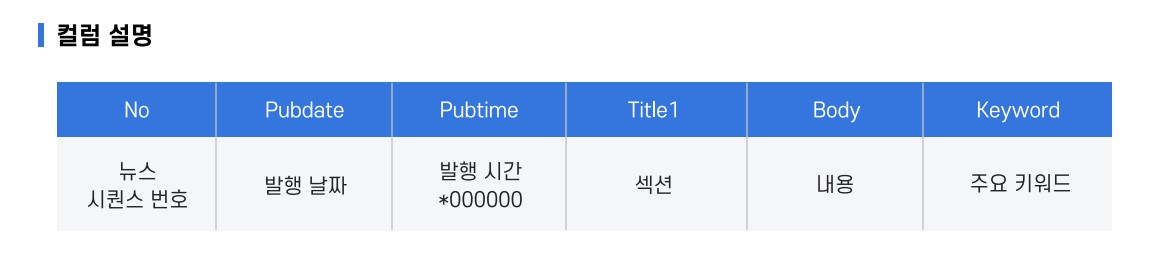

In [6]:
mk_news = pd.read_excel('mk_news_201901_202006.xlsx')
mk_news

,no,pubdate,pubtime,title1,body,keywords
0,2304119,20200312,0.0,사회일반,NaN,NaN
1,3937779,20190112,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,20190101,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,20190101,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,20190101,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"
...,...,...,...,...,...,...
316819,4541564,20200630,225757.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316820,4541571,20200630,230932.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316821,4541579,20200630,231823.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 허은경 객원기자]...,NaN
316822,4541586,20200630,232907.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN


In [7]:
mk = mk_news.copy()

mk.columns

Index(['no', 'pubdate', 'pubtime', 'title1', 'body', 'keywords'], dtype='object')

In [8]:
#내용 중복 제거
new_mk = mk.drop_duplicates(['title1','body'], keep='first', ignore_index = True)
len(new_mk)

297623

In [9]:
#title1에 있는 카테고리는 총 174개
new_mk['title1'].unique()

array(['사회일반', '출판/도서', '테마기획', '의약/건강', '중견/중소기업', '증권계동향', '노동/노사',
       '경제일반', '문화산업', '공연/전시/음악', '신문/방송', '바둑', '기자24시', '매경칼럼', '사외칼럼',
       '인물/인터뷰', '인사', '사설', '아파트/분양', '신도시/토지', '유통·섬유·음식료', '외환·환율',
       '금융정책·일반', '카드·캐피털', '과학기술/특허', '사고/알림', '경기/지표', '정치일반', '해외증시',
       '채권/펀드', '국제금융', '국제경제', '국제산업', '국제정치', '항공·해운', '자동차', '기업 경영',
       '축구', '골프', '레저/관광', '기업정보', '남북관계', '외교·국방', '시세/시황', '법원·검찰·경찰',
       '교통/환경/날씨', '카툰', '핫이슈', '방송/TV', '가요', '사건·사고', '기타', '야구',
       '컴퓨터/정보통신', '무역/통상', nan, '세금', '국제사회', '전기·전자·통신', '국제사건/사고',
       'Economy', '헬스저널', '기업일반·재계동향', '교육', '건설업계 동향', '보건/복지', 'Seoul',
       '스포츠(기타)', '중공업·기계·금속', '지역경제', '부음', '행정·지자체', '취업/채용', '공시',
       '은행', '상가/오피스텔', '보험', '시황', '칼럼', '창업', 'Asia', 'Market',
       'CONSUMER JOURNAL', '저축은행·기타', '포토', 'Biz', '세제/정책', '화학·에너지',
       'Cover Story', 'Review&Observation', 'Photos', '벤쳐/벤쳐캐피탈',
       '재개발/재건축', '증권정책', '당좌거래 정지', '영화', 'THE BIZ TIMES',
       'Money & Rich

In [10]:
new_mk.isnull().sum()

no               0
pubdate          0
pubtime          1
title1        9541
body             2
keywords    141268
dtype: int64

### 데이터 정제

In [11]:
#body의 1번째에 해당하는 값을 300자까지 출력
example = new_mk['body'][1][:300]
type(example)

str

In [12]:
import re
example1 = re.sub('[^ㄱ-힣A-Z]',' ',example )
example1

'                           야바위 게임   마이클 슈월비 지음   노정태 옮김    만    원  도덕의 문제로 불평등의 심각함을 말할 수 있다고 주장하는 책  슈월비는 불평등 구조를 유지하며 도덕과 부의 문제를 일으키는  있는 자 들의  가지 기본 법칙을 소개한다  문예출판사 펴냄    직장인의 바른 습관   문성후 지음    만    원 주   시간 근무제라는 새로운 업무 환경에 직면한 직장인들의 일과 삶에 꼭 필요한 습관을 담은 직장 생활 지침서다  이지퍼블리싱 펴냄    마취의 시대   로랑 드 쉬테르 '

In [13]:
#모든 body에 대해 정규화 진행
news_sub = []

for i in range(len(new_mk)):
  news_sub.append(re.sub('[^ㄱ-힣A-Z]',' ', str(new_mk['body'][i])))

new_mk['정규화'] = news_sub

In [14]:
new_mk['정규화'][15]

#new_mk는 정규화만 된 상태

'       경제기상도                             스마트폰과 TV 등 전자 제품의 핵심 부품인 디스플레이는     년 양극화가 가속화될 전망이다  액정표시장치 LCD 는 공급과잉으로 시장이 포화 상태에 이를 것으로 보이는 데 비해 유기발광다이오드 OLED 는 당분간 성장세를 이어갈 것으로 예상된다  LCD 시장은 중국이 이미 패권을 잡은 상태다  중국은  제조       기치 아래 그동안 양산 규모를 대폭 늘려오고 있다  특히 중국 정부 지원에 힘입어 BOE는 TV용 LCD 패널 세계  위 자리를 차지한 상태다  시장조사기관 DSCC에 따르면 중국 정부는     년까지     억달러를 반도체 디스플레이에 지원할 예정이다  BOE가 시설과 연구개발에 투자한 자금 중    는 정부 보조금이었다      년 BOE는 물론 차이나스타 CSOT  등이 양산을 더욱 늘릴 것으로 예상된다  LCD 패널 가격이 하락세에서 벗어나지 못할 요인이다  시장조사기관 위츠뷰에 따르면     년  분기 평균   인치 LCD 패널 값은      하락한   달러를 기록했다  또   인치 대형 패널도      떨어진    달러로 집계됐다  LCD 패널 값 하락은     년에도 이어질 전망이다  반면     년 OLED 시장은 TV 대형화와 스마트폰 고급화에 맞물려 성장세가 예상된다  유비리서치에 따르면 OLED 시장은     년    억달러에서     년    억달러로 성장한 뒤     년    억달러로 늘어날 전망이다  특히 OLED는 LCD에 비해 기술 장벽이 아직은 높아 모바일 패널은 삼성디스플레이  TV 패널은 LG디스플레이가 주도권을 쥐고 있다  따라서 삼성디스플레이와 LG디스플레이는 OLED 전환에 박차를 가해 중국 업체들과 격차를 확대할 것으로 예상되다  LG디스플레이는 OLED 매출 비중을 현재    에서 향후    까지 끌어올린다는 계획을 갖고 있다  현재 경기 파주 E  E 라인    세대 에서 OLED 패널을 월  만여 장 원판 기준  생산하고 

## 한가지만 실습 - Business_strategy

In [15]:
#Business_strategy만 뽑아내기
Business_strategy = new_mk[new_mk.title1=='Business Strategy']
Business_strategy.reset_index(inplace=True)
Business_strategy

,index,no,pubdate,pubtime,title1,body,keywords,정규화
0,3287,3961020,20190107,161524.0,Business Strategy,사티아 나델라(51) 최고경영자(CEO)가 마이크로소프트로 취임한지 5년 만에 이...,NaN,사티아 나델라 최고경영자 CEO 가 마이크로소프트로 취임한지 년 만에 이...
1,3327,3961106,20190107,164646.0,Business Strategy,"12월 1일, 대한민국이 ‘미래’를 쏘아 올렸다. SK텔레콤·KT·LG유플러스 이...",NaN,월 일 대한민국이 미래 를 쏘아 올렸다 SK텔레콤 KT LG유플러스 이...
2,3845,3962005,20190108,140808.0,Business Strategy,한국 조선업은 2018년 연간 수주 실적에서 중국을 제치고 세계 1위를 달성한 것...,NaN,한국 조선업은 년 연간 수주 실적에서 중국을 제치고 세계 위를 달성한 것...
3,4036,3962331,20190108,171552.0,Business Strategy,주 52시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다. 물론 주 52시간 근...,NaN,주 시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다 물론 주 시간 근...
4,18829,3991071,20190208,142605.0,Business Strategy,TV는 언제나 집안의 중심을 차지해왔다. 기술 발전으로 잠시 관심에서 멀어진 듯한...,NaN,TV는 언제나 집안의 중심을 차지해왔다 기술 발전으로 잠시 관심에서 멀어진 듯한...
...,...,...,...,...,...,...,...,...
99,278475,4505509,20200529,144352.0,Business Strategy,코로나19 장기화로 ‘비대면 사회’가 가속화하는 가운데 온라인 쇼핑이 ‘포스트 코로...,NaN,코로나 장기화로 비대면 사회 가 가속화하는 가운데 온라인 쇼핑이 포스트 코로...
100,278537,4505614,20200529,154334.0,Business Strategy,‘동영상 시대’가 왔다. 미취학 아동부터 7080 노인까지 저마다 즐겨 찾는 영상 ...,NaN,동영상 시대 가 왔다 미취학 아동부터 노인까지 저마다 즐겨 찾는 영상 ...
101,278559,4505656,20200529,161124.0,Business Strategy,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,NaN,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...
102,282478,4513059,20200605,103855.0,Business Strategy,"▶“심장박동처럼 울리는 배기음, 날카로운 코너링의\n박진감, 드라이빙의 짜릿함과 스...",NaN,심장박동처럼 울리는 배기음 날카로운 코너링의 박진감 드라이빙의 짜릿함과 스릴...


In [16]:
#포함 단어 검색
a = Business_strategy['정규화'][Business_strategy['정규화'].str.contains('코로나|이마트')].reset_index()
a['정규화'][4]

' 지난  월   일 종영한   N의 예능 프로그램  스페인하숙 은 말 그대로 스페인 하숙집에서 밥 짓고 청소하는 이야기다  출연자인 배우 차승원과 유해진  배정남이 스페인과 프랑스를 잇는 산티아고 순례길 작은 마을에서 순례자들을 맞는다  동트기 전 일어나 밥을 안치고    첩 반상을 차려 한식을 대접하는 이 프로그램의 숨은 주인공은 따로 있었다  김치찌개와 라면  돼지불고기를 소담하게 품는 그릇이다  라면을 담는 면기  과일과 아이스크림을 얹은 디저트 그릇 등이 방송 후 실시간 검색어에 오르내렸다    이 프로그램에서 사용한 모든 그릇은 CJ ENM 오쇼핑 부문에서 제작한  오덴세 다  지난  월   일 첫 방송을 시작한 이후  월 말까지 매출은 방송 전 같은 기간보다     상승했다  리빙 편집숍  백화점 단독 매장 등 오프라인 매장에서의 매출 증가율은    로  온라인 매출 증가율     보다  배 가까이 높았다    스페인하숙 에 등장한 오덴세  얀테 아츠 와  레고트 라인 중  레고트 는 전국   여 개 매장에서도 재고를 찾기 어려운 상황이다                              CJ ENM 오쇼핑 부문 오덴세  북유럽 스타일 간결한 디자인 힘입어 경쟁사 채널  백화점까지 섭렵  오덴세는 CJ ENM 오쇼핑 부문에서 홈쇼핑 자체 브랜드 PB 로 개발한 제품이지만  한 단계 더 나아갔다  일반 PB가 자체 유통 채널을 통해서만 주로 유통되는 반면  오덴세는 CJ 오쇼핑뿐 아니라 경쟁사인 GS샵이나 롯데홈쇼핑에서도 판매한다  오프라인 판로도 다양하다  지난해 한샘에 입점한 테이블웨어 브랜드 중 매출  위에 올랐고  백화점 매장도 냈다   월 방송 시점에 맞춰 롯데백화점 잠실점에는  오덴세 다이네트  매장을 열었다  이 매장에서   여 일 동안 오덴세 매출만  억원이 나왔다  신세계백화점 강남점과 현대백화점 판교점에서도 스페인하숙 팝업스토어를 열었다  지난달 말에는 롯데백화점 노원점에  오덴세 다이네트   호점을 오픈했다  해외 진출도 시도한

In [17]:
from konlpy.tag import Okt
okt = Okt()

In [18]:
#토큰화
news_sub2 = []

for i in range(len(Business_strategy)):
  news_sub2.append(okt.morphs(Business_strategy['정규화'][i]))

Business_strategy['토큰화'] = news_sub2

In [19]:
Business_strategy.drop(columns='keywords')

,index,no,pubdate,pubtime,title1,body,정규화,토큰화
0,3287,3961020,20190107,161524.0,Business Strategy,사티아 나델라(51) 최고경영자(CEO)가 마이크로소프트로 취임한지 5년 만에 이...,사티아 나델라 최고경영자 CEO 가 마이크로소프트로 취임한지 년 만에 이...,"[사티, 아, 나델, 라, 최고경영자, CEO, 가, 마이크로소프트, 로, 취임, ..."
1,3327,3961106,20190107,164646.0,Business Strategy,"12월 1일, 대한민국이 ‘미래’를 쏘아 올렸다. SK텔레콤·KT·LG유플러스 이...",월 일 대한민국이 미래 를 쏘아 올렸다 SK텔레콤 KT LG유플러스 이...,"[월, 일, 대한민국, 이, 미래, 를, 쏘아, 올렸다, SK, 텔레콤, KT, L..."
2,3845,3962005,20190108,140808.0,Business Strategy,한국 조선업은 2018년 연간 수주 실적에서 중국을 제치고 세계 1위를 달성한 것...,한국 조선업은 년 연간 수주 실적에서 중국을 제치고 세계 위를 달성한 것...,"[한국, 조선업, 은, 년, 연간, 수주, 실적, 에서, 중국, 을, 제, 치고, ..."
3,4036,3962331,20190108,171552.0,Business Strategy,주 52시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다. 물론 주 52시간 근...,주 시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다 물론 주 시간 근...,"[주, 시간, 근로, 제의, 본격, 적, 의무, 시행, 이, 눈앞, 으로, 다가왔다..."
4,18829,3991071,20190208,142605.0,Business Strategy,TV는 언제나 집안의 중심을 차지해왔다. 기술 발전으로 잠시 관심에서 멀어진 듯한...,TV는 언제나 집안의 중심을 차지해왔다 기술 발전으로 잠시 관심에서 멀어진 듯한...,"[TV, 는, 언제나, 집안, 의, 중심, 을, 차지, 해왔다, 기술, 발전, 으로..."
...,...,...,...,...,...,...,...,...
99,278475,4505509,20200529,144352.0,Business Strategy,코로나19 장기화로 ‘비대면 사회’가 가속화하는 가운데 온라인 쇼핑이 ‘포스트 코로...,코로나 장기화로 비대면 사회 가 가속화하는 가운데 온라인 쇼핑이 포스트 코로...,"[코로나, 장기, 화로, 비대, 면, 사회, 가, 가속, 화하는, 가운데, 온라인,..."
100,278537,4505614,20200529,154334.0,Business Strategy,‘동영상 시대’가 왔다. 미취학 아동부터 7080 노인까지 저마다 즐겨 찾는 영상 ...,동영상 시대 가 왔다 미취학 아동부터 노인까지 저마다 즐겨 찾는 영상 ...,"[동영상, 시대, 가, 왔다, 미취, 학, 아동, 부터, 노인, 까지, 저, 마다,..."
101,278559,4505656,20200529,161124.0,Business Strategy,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,"[유통업, 계, 의, 온라인, 화가, 가속, 화하면서, 오프라인, 매장, 은, 단순..."
102,282478,4513059,20200605,103855.0,Business Strategy,"▶“심장박동처럼 울리는 배기음, 날카로운 코너링의\n박진감, 드라이빙의 짜릿함과 스...",심장박동처럼 울리는 배기음 날카로운 코너링의 박진감 드라이빙의 짜릿함과 스릴...,"[심장, 박동, 처럼, 울리는, 배기음, 날카로운, 코너링, 의, 박진, 감, 드라..."


In [20]:
oktTag = []

for i in range(len(Business_strategy['정규화'])):
  oktTag.append(okt.pos(Business_strategy['정규화'][i]))

Business_strategy['postagging'] = oktTag

KeyboardInterrupt: ignored

In [ ]:
Business_strategy.head()

In [ ]:
stopword = pd.read_csv('stopword_korean.csv')

In [ ]:
new_stopword = stopword.drop(columns='Unnamed: 0')

In [ ]:
#불용어처리
from collections import Counter
Counter(Business_strategy['postagging'][0]).most_common()

In [ ]:
stopword_list = stopword['불용어'].tolist()
a = ['매우','정말','완전']
stopword_list.extend(a)
stopword_list

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["나는 너를 완전 많이 정말 매우 아이쿠 사랑해."]

vect = CountVectorizer(stop_words=stopword_list)
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

In [ ]:
common = []

for i in range(len(Business_strategy['postagging'])):
  common.append(Counter(Business_strategy['postagging'][i]).most_common())
common[100][8][0][1]
#4번째: ('append','Verb')에서 'Verb'
#3번째: (('append','Verb'),3)에서 ('append','Verb')

In [ ]:
Business_strategy['postagging'][103][1][1]

### 해당 키워드와 맞는 기사 찾아내기 (전체)

In [21]:
#포함 단어 검색
word_include = new_mk[new_mk['정규화'].str.contains('신선식품')]
word_include

,no,pubdate,pubtime,title1,body,keywords,정규화
1348,3956911,20190103,104033.0,유통·섬유·음식료,<!--[[--image0--]]//--> 지난해 '블랙이오' 행사를 흥행시켰던 ...,"이마트,신세계,전복이 990원,국민 가격 프로젝트,신세계만의 스마트한 초저가모델",지난해 블랙이오 행사를 흥행시켰던 ...
1480,3957189,20190103,143430.0,People,대부분의 질문에 대한 답이 ‘회사가 추구하는 가치’에 대한 설명으로 이어졌다. 인...,NaN,대부분의 질문에 대한 답이 회사가 추구하는 가치 에 대한 설명으로 이어졌다 인...
1639,3957470,20190104,0.0,유통·섬유·음식료,온라인 쇼핑 공세에 맞선 이마트가 '신선식품 특가' 카드를 꺼내들었다. 온라인 쇼핑...,"이마트,가격",온라인 쇼핑 공세에 맞선 이마트가 신선식품 특가 카드를 꺼내들었다 온라인 쇼핑...
1915,3958078,20190104,93053.0,NaN,[숫자로 보는 세상] \n <!--[[--image0--]]//--> ◆4036억9...,NaN,숫자로 보는 세상 억 ...
2025,3958307,20190104,101910.0,유통·섬유·음식료,2019년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...,NaN,년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...
...,...,...,...,...,...,...,...
296000,4538517,20200629,0.0,백화점/마트,<!--[[--image0--]]//--> 지난 26일 시작한 '대한민국 동행세일...,"백화점,마트,동행세일",지난 일 시작한 대한민국 동행세일...
296267,4539020,20200630,0.0,테마기획,◆ 위기속 상생 경영 ◆\n <!--[[--image0--]]//--> 롯데는 최근...,"롯데,특집",위기속 상생 경영 롯데는 최근 ...
296688,4539641,20200629,150556.0,비즈니스,코로나19 사태의 가장 큰 피해자 중 하나는 자영업자다. 감염 우려로 매장을 방문하...,NaN,코로나 사태의 가장 큰 피해자 중 하나는 자영업자다 감염 우려로 매장을 방문하...
297248,4540562,20200630,111913.0,유통·섬유·음식료,<!--[[--image0--]]//--> 홈플러스는 자사 창고형 스페셜 매장의 ...,"홈플러스 더 클럽,창고형 스페셜 매장,홈플러스,모바일",홈플러스는 자사 창고형 스페셜 매장의 ...


In [22]:
useless_title = ['가요','건강','골프','국제사건/사고','국제사회','국회','남북관계','노동/노사','당좌거래 정지','라이프','미국/중남미','바둑','방송/TV','법원·검찰·경찰','보안/해킹','부음','사고/알림','소비생활','스페셜 리포트','신문사-포토','신설법인','여행','연예','영화','외환·환율','요약뉴스','인사','전시','증시지표','출판/도서','카툰','특허','패션','포토','핫이슈']

In [23]:
p = word_include[~word_include['title1'].isin(useless_title)]
p

,no,pubdate,pubtime,title1,body,keywords,정규화
1348,3956911,20190103,104033.0,유통·섬유·음식료,<!--[[--image0--]]//--> 지난해 '블랙이오' 행사를 흥행시켰던 ...,"이마트,신세계,전복이 990원,국민 가격 프로젝트,신세계만의 스마트한 초저가모델",지난해 블랙이오 행사를 흥행시켰던 ...
1480,3957189,20190103,143430.0,People,대부분의 질문에 대한 답이 ‘회사가 추구하는 가치’에 대한 설명으로 이어졌다. 인...,NaN,대부분의 질문에 대한 답이 회사가 추구하는 가치 에 대한 설명으로 이어졌다 인...
1639,3957470,20190104,0.0,유통·섬유·음식료,온라인 쇼핑 공세에 맞선 이마트가 '신선식품 특가' 카드를 꺼내들었다. 온라인 쇼핑...,"이마트,가격",온라인 쇼핑 공세에 맞선 이마트가 신선식품 특가 카드를 꺼내들었다 온라인 쇼핑...
1915,3958078,20190104,93053.0,NaN,[숫자로 보는 세상] \n <!--[[--image0--]]//--> ◆4036억9...,NaN,숫자로 보는 세상 억 ...
2025,3958307,20190104,101910.0,유통·섬유·음식료,2019년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...,NaN,년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...
...,...,...,...,...,...,...,...
296000,4538517,20200629,0.0,백화점/마트,<!--[[--image0--]]//--> 지난 26일 시작한 '대한민국 동행세일...,"백화점,마트,동행세일",지난 일 시작한 대한민국 동행세일...
296267,4539020,20200630,0.0,테마기획,◆ 위기속 상생 경영 ◆\n <!--[[--image0--]]//--> 롯데는 최근...,"롯데,특집",위기속 상생 경영 롯데는 최근 ...
296688,4539641,20200629,150556.0,비즈니스,코로나19 사태의 가장 큰 피해자 중 하나는 자영업자다. 감염 우려로 매장을 방문하...,NaN,코로나 사태의 가장 큰 피해자 중 하나는 자영업자다 감염 우려로 매장을 방문하...
297248,4540562,20200630,111913.0,유통·섬유·음식료,<!--[[--image0--]]//--> 홈플러스는 자사 창고형 스페셜 매장의 ...,"홈플러스 더 클럽,창고형 스페셜 매장,홈플러스,모바일",홈플러스는 자사 창고형 스페셜 매장의 ...


In [24]:
#해당 단어가 포함된 기사 추출하는 함수
def select_news(신선식품):
  word_include = new_mk[new_mk['정규화'].str.contains(신선식품)].reset_index()
  useless_title = ['가요','건강','골프','국제사건/사고','국제사회','국회','남북관계','노동/노사','당좌거래 정지','라이프','미국/중남미','바둑','방송/TV','법원·검찰·경찰','보안/해킹','부음','사고/알림','소비생활','스페셜 리포트','신문사-포토','신설법인','여행','연예','영화','외환·환율','요약뉴스','인사','전시','증시지표','출판/도서','카툰','특허','패션','포토','핫이슈']
  p = word_include[~word_include['title1'].isin(useless_title)].reset_index()
  return p

In [25]:
select_news('신선식품')['정규화']

0                               지난해  블랙이오  행사를 흥행시켰던 ...
1       대부분의 질문에 대한 답이  회사가 추구하는 가치 에 대한 설명으로 이어졌다  인...
2      온라인 쇼핑 공세에 맞선 이마트가  신선식품 특가  카드를 꺼내들었다  온라인 쇼핑...
3       숫자로 보는 세상                                 억  ...
4          년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...
                             ...                        
537                             지난   일 시작한  대한민국 동행세일...
538      위기속 상생 경영                            롯데는 최근 ...
539    코로나   사태의 가장 큰 피해자 중 하나는 자영업자다  감염 우려로 매장을 방문하...
540                             홈플러스는 자사 창고형 스페셜 매장의 ...
541                             스마트 팩토리 전문기업 진코퍼레이션 대...
Name: 정규화, Length: 542, dtype: object

In [27]:
#토큰화
tokenize_news = []

for i in range(len(select_news('신선식품'))):
  tokenize_news.append(okt.morphs(select_news('신선식품')['정규화'][i]))

# select_news('신선식품')['토큰화'] = tokenize_news

In [ ]:
#리스트 안에 리스트를 하나로 합쳐주는 과정, from_iterable 메소드
import itertools
a = list(itertools.chain.from_iterable(tokenize_news))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=stopword_list)
print(vect.fit_transform(a).toarray())
print(vect.vocabulary_)

### 이후

In [ ]:
stopPos = ['Josa','Conjunction','Foreign','Adverb','Suffix']

stopWord = stopword

post =[]
word=[]

for i in range(len(Business_strategy['postagging'])):
  post.append(Business_strategy['postagging'][i]) #
  for tag, p in enumerate(post):
    if tag[p][1] not in stopPos:
      if tag[p][0] not in stopWord:
        word.append(tag[p][0])


#post 안에 postagging 별로 list화 되어있음
word

In [ ]:
for i in range(Business_strategy['postagging']):
  if Business_strategy['postagging'][i] in new_stopword:
    

### 필요베이스 설치

In [ ]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
#!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
#%cd Mecab-ko-for-Google-Colab/

In [ ]:
#!bash install_mecab-ko_on_colab190912.sh

In [ ]:
new_mk.head(10)

#### 토큰화

In [ ]:
#okt가 kkma보다 상대적으로 명사를 정확하게 분류하기 때문에, okt 토큰을 사용하여 진행한다.
okt_tokens = okt.morphs(new_mk['정규화'][50])
okt_tokens

### 전체 다 하면 오래걸리니까, 필요하다고 생각되는 부분의 카테고리를 나누고, 그것에 대한 토큰화를 진행 후, 필요시 merge시키는 방법으로 진행해보자

In [ ]:
# news_sub2 = []

# for i in range(len(new_mk['정규화'])):
#   news_sub.append(okt.morphs(new_mk['정규화'][i]))

# new_mk['토큰화'] = news_sub2

In [ ]:
# new_mk['정규화'].head()

In [ ]:
# new_mk['토큰화'] = []

# for i in range(0,5):
#   okt_tokens += okt.morphs(new_mk['정규화'][i])
#   if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
#     print('number',i,'is done')
# okt_tokens

In [ ]:
# okt_tokens = []

# for i in range(len(new_mk['정규화'])):
#   okt_tokens += okt.morphs(new_mk['정규화'][i])
#   if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
#     print('number',i,'is done')
# len(okt_tokens)

#### 품사부착

In [ ]:
# #품사부착
# oktTag = []
# for token in okt_tokens:
#   oktTag += okt.pos(token)

# oktTag

#### pos tagging

In [ ]:
# #pos tagging

# from collections import Counter as counter

# counter(kkmaTag).most_common()

In [ ]:
# kkma_tokens = []

# for i in range(len(new_mk)):
#   kkma.morphs(new_mk['정규화'][i])